In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [30]:
ur= 'https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/challenge2_dataset.csv'
df = pd.read_csv(ur,error_bad_lines=False)
df.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [31]:
df['Target'].value_counts()

False    1563
True      421
Name: Target, dtype: int64

In [32]:
df.shape

(1995, 4)

In [33]:
df.isnull().sum()

1          3
2          3
3          2
Target    11
dtype: int64

In [35]:
len(df.loc[(df['1'].isnull())|(df['2'].isnull())|(df['3'].isnull())|(df['Target'].isnull())])

18

In [36]:
df.loc[(df['1'].isnull())|(df['2'].isnull())|(df['3'].isnull())|(df['Target'].isnull())]
#only 0.9% missing entries so we can delete these

,1,2,3,Target
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
10,0.80,0.12,18.0,NaN
32,0.46,0.14,9.0,NaN
44,0.63,0.31,22.0,NaN
62,0.74,0.22,20.0,NaN
76,0.74,0.33,13.0,NaN
94,0.60,0.12,19.0,NaN
136,0.49,0.33,19.0,NaN
279,NaN,0.28,15.0,NaN


In [37]:
df_new=df.dropna()
len(df_new)

1977

In [38]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(df_new['Target'])
variable = lab_enc.transform(df_new['Target'])
df_new['Target'] = variable

C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [39]:
df_new.head()

,1,2,3,Target
0,0.60,0.31,13.0,0
1,0.74,0.33,21.0,0
4,0.77,0.15,15.0,1
5,0.46,0.17,18.0,0
6,0.49,0.26,10.0,0


In [40]:
x,y=df_new.loc[:,df_new.columns !='Target'],df_new.loc[:,'Target']

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)

In [42]:
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

[Text(580.5102272727272, 518.8909090909091, '3 <= 12.5\ngini = 0.339\nsamples = 1482\nvalue = [1161, 321]\nclass = False'),
 Text(314.5090909090909, 469.4727272727273, '1 <= 0.555\ngini = 0.489\nsamples = 443\nvalue = [189, 254]\nclass = True'),
 Text(164.86363636363635, 420.05454545454546, '2 <= 0.16\ngini = 0.303\nsamples = 183\nvalue = [149, 34]\nclass = False'),
 Text(96.38181818181818, 370.6363636363636, '3 <= 10.5\ngini = 0.499\nsamples = 44\nvalue = [21, 23]\nclass = True'),
 Text(60.87272727272727, 321.21818181818185, '1 <= 0.475\ngini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = True'),
 Text(50.72727272727272, 271.8, '3 <= 9.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]\nclass = False'),
 Text(30.436363636363634, 222.38181818181818, '1 <= 0.43\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = True'),
 Text(20.29090909090909, 172.96363636363634, '2 <= 0.11\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = False'),
 Text(10.145454545454545, 123.54545454545456, 'gini = 0.0\n

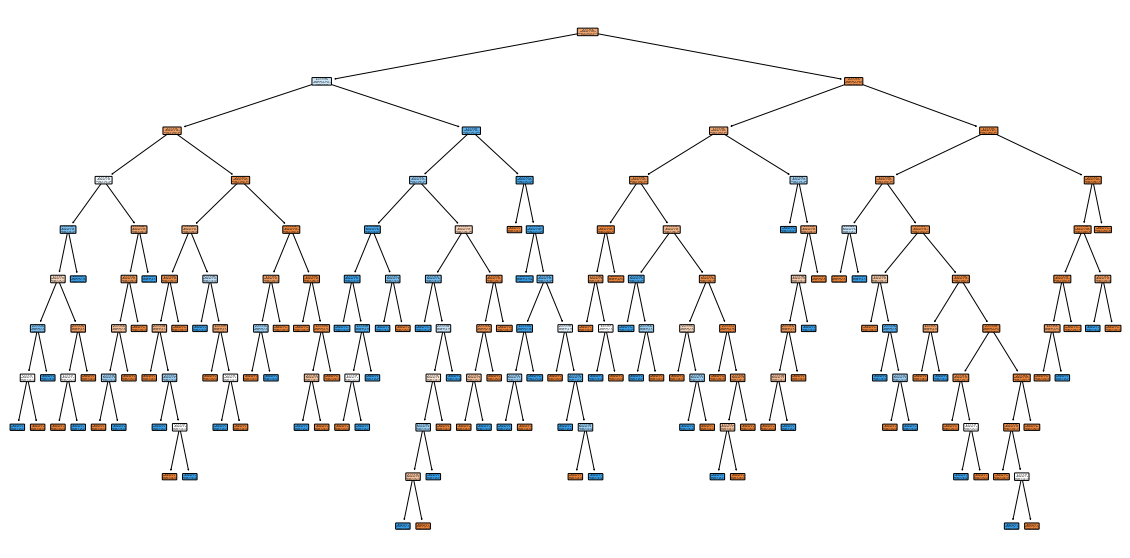

In [43]:
plt.figure(figsize=(20,10))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['False','True'],
          feature_names=x.columns)

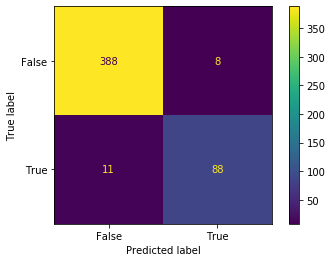

In [44]:
plot_confusion_matrix(clf_dt,xtest,ytest,display_labels=['False','True'])
#false correctly classified 97.97%
#true correctly classified 88.88%

In [45]:
clf_dt.score(xtest,ytest)#accuracy without SMOTE

0.9616161616161616

In [53]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [54]:
X,Y=smt.fit_sample(x,y)

In [55]:
X.shape,Y.shape

((3114, 3), (3114,))

In [56]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=42)

In [57]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(Xtrain,Ytrain)

DecisionTreeClassifier(random_state=42)

In [58]:
clf.score(Xtest,Ytest)

0.9589216944801027

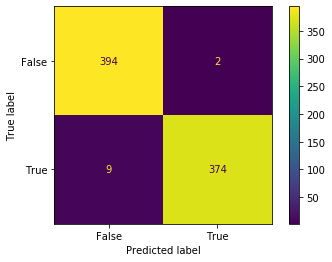

In [59]:
plot_confusion_matrix(clf_dt,Xtest,Ytest,display_labels=['False','True'])
#false correctly classified 99.97% by implementing smote
#true correctly classified 97.12% so 9% increase in classification for true.

In [77]:
ur2= 'https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/challenge2_prediction.csv'
df2 = pd.read_csv(ur2,error_bad_lines=False)
df2.head()
len(df2)

855

In [78]:
zero_not_accepted=['1','2','3']
for column in zero_not_accepted:
    
    mean=int(df2[column].mean(skipna=True))
    df2[column]=df2[column].replace(np.NaN,mean)

In [79]:
df2.isnull().sum()

1    0
2    0
3    0
dtype: int64

In [83]:
pred_clf=clf.predict(df2)
pred_clf.shape

(855,)

In [84]:
dataset = pd.DataFrame({'Target':pred_clf})
dataset

,Target
0,0
1,0
2,1
3,0
4,0
...,...
850,0
851,1
852,0
853,0


In [88]:
result= pd.concat([dff,dataset],axis=1)
result['Target'] = result['Target'].map({1: True,0: False})


False    660
True     195
Name: Target, dtype: int64

In [89]:
result.to_csv(r'C:\\Users\\Subrat\\Downloads\\resultcct2.csv', index=False)